<a href="https://colab.research.google.com/github/nagolinc/notebooks/blob/main/Safety_Waifu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Display Web3 Address as Waifu

This notebooks was created by Logan Zoellner (@nagolinc, https://loganzoellner.com)

This notebook makes use of @AydaoAI's "This Anime Does not exist" (which you can read more about here: https://www.gwern.net/Faces#extended-stylegan2-danbooru2019-aydao).

And this notebook: https://colab.research.google.com/drive/1oxcJ1tbG77hlggdKd_d8h22nBcIZsLTL by @arfa

TADNE is under a CC BY-NC liscence.

Any code in this repository not otherwise liscenced is herein released under the MIT Liscence.

In [1]:
!nvidia-smi

Sun Feb 21 10:14:38 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.39       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    25W / 300W |      0MiB / 16160MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!git clone https://github.com/shawwn/stylegan2 -b estimator /content/stylegan2

fatal: destination path '/content/stylegan2' already exists and is not an empty directory.


In [3]:
cd /content/

/content


In [4]:
import gdown, os

if not os.path.exists("/content/network-tadne.pkl"):
  #gdown.download('https://drive.google.com/uc?id=1qNhyusI0hwBLI-HOavkNP5I0J0-kcN4C', 'network-tadne.pkl', quiet=False)
  url='https://drive.google.com/uc?id=1LCkyOPmcWBsPlQX_DxKAuPM1Ew_nh83I'
  gdown.download(url, '/content/network-tadne.pkl', quiet=False)


In [5]:

!ls -lrt /content/network-tadne.pkl

-rw-r--r-- 1 root root 1056544230 Feb 21 10:01 /content/network-tadne.pkl


In [6]:
%tensorflow_version 1.x
%cd /content/stylegan2

TensorFlow 1.x selected.
/content/stylegan2


In [7]:
import os
import pickle
import numpy as np
import PIL.Image
import dnnlib
import dnnlib.tflib as tflib
import scipy



attach_debugger <function attach_debugger at 0x7f789c601bf8>
print_status <function print_status at 0x7f789c601f28>
freeze_forever <function freeze_forever at 0x7f789c600158>
quit <function quit at 0x7f789c601e18>
save_and_quit <function save_and_quit at 0x7f789c603268>
throw_exception <function throw_exception at 0x7f789c603510>


In [8]:
from tqdm.notebook import tqdm, trange

In [9]:
tflib.init_tf()
_G, _D, Gs = pickle.load(open("/content/network-tadne.pkl", "rb"))
# _G = Instantaneous snapshot of the generator. Mainly useful for resuming a previous training run.
# _D = Instantaneous snapshot of the discriminator. Mainly useful for resuming a previous training run.
# Gs = Long-term average of the generator. Yields higher-quality results than the instantaneous snapshot.

Setting up TensorFlow plugin "fused_bias_act.cu": Preprocessing... Loading... Done.
Setting up TensorFlow plugin "upfirdn_2d.cu": Preprocessing... Loading... Done.


In [10]:

!git clone https://github.com/nagolinc/stylegan2-pytorch.git /content/stylegan2-pytorch/

fatal: destination path '/content/stylegan2-pytorch' already exists and is not an empty directory.


In [11]:
!cd /content/stylegan2-pytorch/
!git pull

Already up to date.


In [12]:
import subprocess

CUDA_version = [s for s in subprocess.check_output(["nvcc", "--version"]).decode("UTF-8").split(", ") if s.startswith("release")][0].split(" ")[-1]
print("CUDA version:", CUDA_version)

if CUDA_version == "10.0":
    torch_version_suffix = "+cu100"
elif CUDA_version == "10.1":
    torch_version_suffix = "+cu101"
elif CUDA_version == "10.2":
    torch_version_suffix = ""
else:
    torch_version_suffix = "+cu110"

CUDA version: 10.1


In [13]:
!pip install ninja

In [14]:
! pip install torch==1.7.1{torch_version_suffix} torchvision==0.8.2{torch_version_suffix} -f https://download.pytorch.org/whl/torch_stable.html ftfy regex

Looking in links: https://download.pytorch.org/whl/torch_stable.html


In [15]:
%cd /content/stylegan2-pytorch


/content/stylegan2-pytorch


In [16]:
%cd /content/stylegan2-pytorch
from convert_weight import convertStyleGan2

/content/stylegan2-pytorch


In [17]:
#conver the model from tf to torch
ckpt, g, disc,g_train = convertStyleGan2(_G,_D,Gs)
latent_avg=ckpt["latent_avg"]

In [18]:
import torch

In [19]:
import matplotlib.pyplot as plt

In [20]:
def fmtImg(r):
    img = ((r+1)/2*256).clip(0,255).astype(np.uint8).transpose(1,2,0)
    return PIL.Image.fromarray(img, 'RGB')

In [21]:
seed="0x1f9840a85d5af5bf1d1762f925bdaddc4201f984"
arr=bytearray.fromhex(seed[2:])

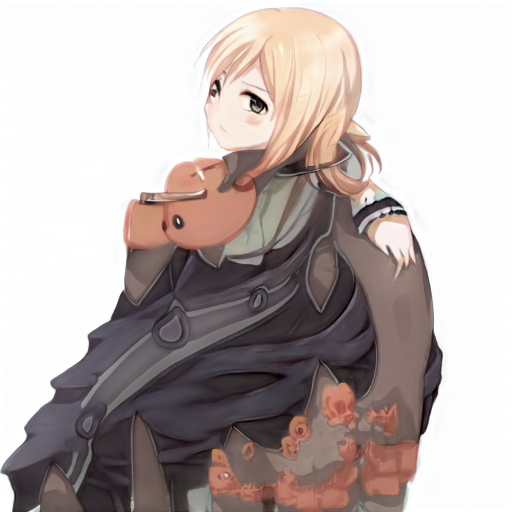

In [23]:
device='cuda'
n_sample=1

g = g.to(device)

inputSize=1024

z = np.random.RandomState(arr).randn(n_sample, inputSize).astype("float32")

with torch.no_grad():
    img_pt, _ = g(
        [torch.from_numpy(z).to(device)],
        truncation=0.25,
        truncation_latent=latent_avg.to(device),
        randomize_noise=False,
    )

display(fmtImg(img_pt.cpu().numpy()[0]))

In [24]:
!pip3 install jsonschema
!pip install Web3

In [25]:
import jsonschema
jsonschema.__version__

'3.2.0'

In [26]:
from web3 import Web3

In [ ]:
Web3.isAddress

In [33]:
def safetyWaifu(address):
  assert Web3.isAddress(address)
  arr=bytearray.fromhex(address[2:])
  z = np.random.RandomState(arr).randn(n_sample, inputSize).astype("float32")

  with torch.no_grad():
      img_pt, _ = g(
          [torch.from_numpy(z).to(device)],
          truncation=0.25,
          truncation_latent=latent_avg.to(device),
          randomize_noise=False,
      )
  return fmtImg(img_pt.cpu().numpy()[0])


Uniswap


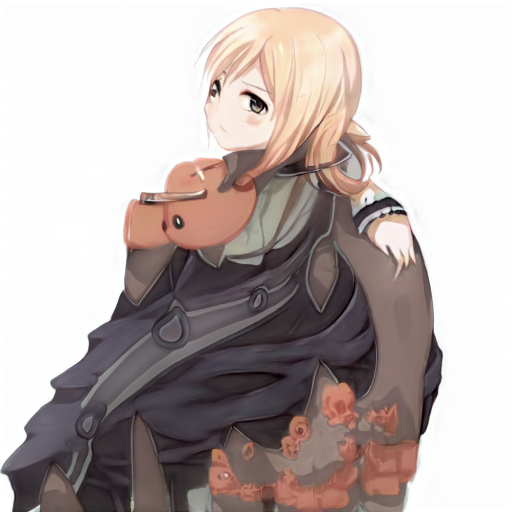

In [36]:
print("Uniswap")
display(safetyWaifu("0x1f9840a85d5af5bf1d1762f925bdaddc4201f984"))

1Inch


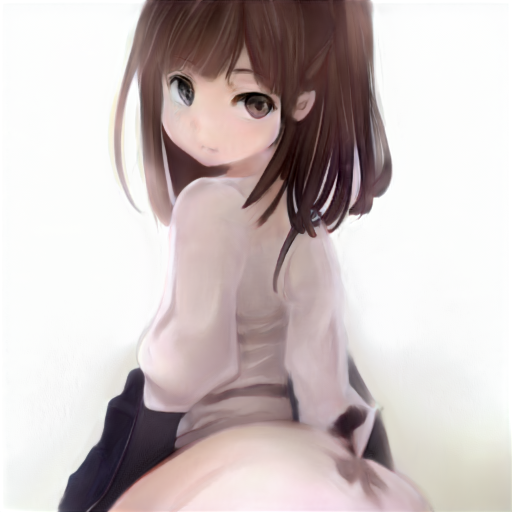

In [37]:
print("1Inch")
display(safetyWaifu("0x111111111117dc0aa78b770fa6a738034120c302"))

USDC


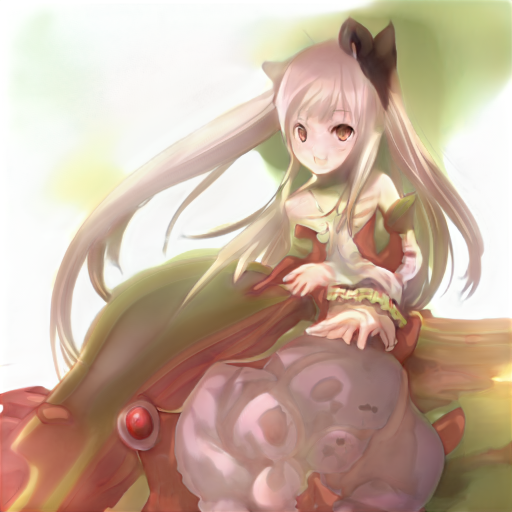

In [38]:
print("USDC")
display(safetyWaifu("0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48"))